L26, Extras - 15-110 CMU-Q, Fall'19, G. Di Caro

***
A few examples about **combining multiple plots, of different type, in one figure** to create powerful and flexible representations of data.

In order to place multiple plot in the same figure, we need to use the `subplots(nrows, ncols, figsize)` method that defines a *grid* (a *matrix*) of  `nrows` $\times$ `ncols` locations where the different plots will be placed. Overall, the figure will have the size defined by `figsize`. 

For instance, a plot defined by `nrows=2` $\times$ `ncols=3` subplots is equivalent to define a figure with a subplot matrix placement as shown below:


<table style="width:50%">
  <tr>
    <td>Subplot 1,1</td>
    <td>Subplot 1,2</td>
    <td>Subplot 1,3</td>
  </tr>
  <tr>
    <td>Subplot 2,1</td>
    <td>Subplot 2,2</td> 
    <td>Subplot 2,3</td>
  </tr>
</table>

A call to `plt.subplots(nrows, ncols, figsize)` return a tuple with the handler of the figure and the handler of the subplots:

`figure, subplots = plt.subplots(nrows, ncols, figsize=(xsize, ysize))`

Each subplot in the *matrix* placement can be referred to using a matrix notation (more precisely, it is of type `ndarray`, defined in `numpy`):

`subplots[i, j]` refers to the subplot in row `i` and column `j`. 

Plots can be added to each subplot by the dot notation:
`subplots[1,0].scatter(x, y)` adds the scatter plot of the lists `x` and `y` to the subplot in row 1 and column 0 of the general figure.

Note that in the commonly adopted terminology of matplotlib, the subplots are usually referred to as *axis*.
***

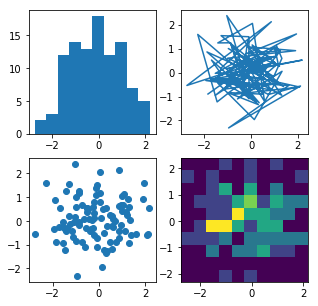

In [36]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(162543)

# the method randn(2, 100) returns a list of 2 lists, each of 100 elements
# drawn from a Standard Normal distribution, which is a Gaussian 
# distribution with mean equal to 0 and variance equal to 1
#
data = np.random.randn(2, 100)

nrows = 2
ncols = 2
figure, subplots = plt.subplots(2, 2, figsize=(5, 5))


subplots[0, 0].hist(data[0])
subplots[1, 0].scatter(data[0], data[1])
subplots[0, 1].plot(data[0], data[1])
subplots[1, 1].hist2d(data[0], data[1])

plt.show()

***
**Spacing between the subplots is not optimal.** It can be adjusted using:

`subplots_adjust(left=None, bottom=None, right=None, 
                 top=None, wspace=None, hspace=None)`

The meaning and some possibly good values for the parameters are:

- `left  = 0.125`  the left side of the subplots of the figure
- `right = 0.9`    the right side of the subplots of the figure
- `bottom = 0.1`   the bottom of the subplots of the figure
- `top = 0.9`      the top of the subplots of the figure
- `wspace = 0.5`   the amount of width reserved for blank space between subplots
- `hspace = 0.34`   the amount of height reserved for white space between subplots
`
***

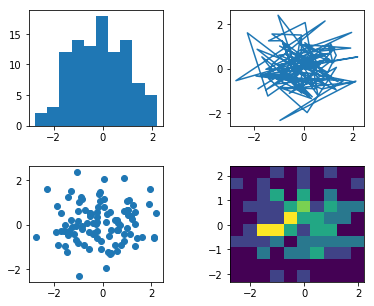

In [37]:
figure, subplots = plt.subplots(2, 2, figsize=(6, 5))

plt.subplots_adjust(left=None, bottom=None, right=None, 
                    top=None, wspace=0.5, hspace=0.35)

subplots[0, 0].hist(data[0])
subplots[1, 0].scatter(data[0], data[1])
subplots[0, 1].plot(data[0], data[1])
subplots[1, 1].hist2d(data[0], data[1])

plt.show()

***
The code that follows is an  example of modeling a **stochastic diffusion process.** $n$ particles are generated from a common source point and diffuse in the environment (a grid) based on probabilistic *forces* that determine the local motion.

The modeled process can also be seen as a **two-dimensional random walk.**
https://en.wikipedia.org/wiki/Random_walk

For examples of diffusion in biology: https://biologydictionary.net/diffusion/

***

In [38]:
import random
from matplotlib import pyplot as plt

def move(x, y, direction):
    if direction == 'N':
        return x, y+1
    elif direction == 'S':
        return x, y-1
    elif direction == 'E':
        return x+1, y
    elif direction == 'W':
        return x-1, y
    elif direction == 'NE':
        return x+1, y+1
    elif direction == 'SE':
        return x+1, y-1
    elif direction == 'SW':
        return x-1, y-1
    elif direction == 'NW':
        return x-1, y+1
    else:
        return (-1,-1)
    

In [39]:
def diffusion(d = [], dim_x=10, dim_y=10):
    
    # starting point is at y=0 and at the mid x coordinate
    (x,y) = (dim_x//2, 0)
    
    # if the input is an empty list, an equal probability, 1/8, is
    # assigned to all the 8 feasible moves
    #
    if d == []:
        d = [0]*8
        for i in range(len(d)):
            d[i] = 1/8
            
    # the probability intervals implement the so-called roulette wheel selection        
    prob_intervals = [0]*8
    
    # this dictionary is just for mapping in a more clear way indexes and directions
    directions_map = {0: 'N', 1:'NE', 2:'E', 3:'SE', 4:'S',
                      5:'SW', 6:'W', 7:'NW'}

    for i in range(len(prob_intervals)):
        if i == 0:
            prob_intervals[i] = d[i]
        else:
            prob_intervals[i] = prob_intervals[i-1] + d[i]
    
    steps = 0
    path_x = []
    path_y = []
    
    while(x < dim_x and y < dim_y):
        p = random.uniform(0,1)
        for i in range(len(prob_intervals)):
            if p < prob_intervals[i]:
                (x,y) = move(x, y, directions_map[i])
                path_x.append(x)
                path_y.append(y)
                break
        steps += 1
        
    # check which is the wall that has been hit, and that has ended the process    
    if y <= 0:
        wall = 'floor'
    elif y >= dim_y:
        wall = 'ceiling'
    elif x >= dim_x:
        wall = 'right'
    elif x <= 0:
        wall = 'left'
    else:
        print('Wrong final position!')
    
    return path_x, path_y, steps, (x,y), wall


Particle 0
	Steps: 554
	Final position: (54, 100)
	Final wall: ceiling
Particle 1
	Steps: 586
	Final position: (38, 100)
	Final wall: ceiling
Particle 2
	Steps: 580
	Final position: (71, 100)
	Final wall: ceiling
Particle 3
	Steps: 947
	Final position: (70, 100)
	Final wall: ceiling
Particle 4
	Steps: 428
	Final position: (75, 100)
	Final wall: ceiling

Avg number of steps: 619.0
Fraction of different final positions: 1.0
Final wall probabilities: ceiling(5)  


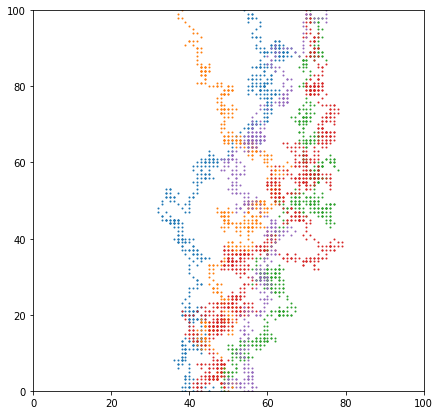

In [40]:
xmax = 100
ymax = 100
particles = 5

walls_stats = {}
steps_sum = 0
final_set = set()

plt.figure(figsize=(7,7))

for i in range(particles):
    x,y, steps, final, wall = diffusion([0.125, 0.15, 0.125, 0.1, 0.125, 0.1, 0.125, 0.15], xmax, ymax)
    x,y, steps, final, wall = diffusion([0.15, 0.15, 0.15, 0.1, 0.1, 0.1, 0.1, 0.15], xmax, ymax)
    #x,y, steps, final, wall = diffusion([0.2, 0.2, 0.15, 0.05, 0, 0.05, 0.15, 0.2], xmax, ymax)
    #x,y, steps, final, wall = diffusion([], xmax, ymax)
    
    print('Particle', i)
    print('\tSteps:', steps)
    print('\tFinal position:', final)
    print('\tFinal wall:', wall)
    
    if wall in walls_stats:
        walls_stats[wall] += 1
    else:
        walls_stats[wall] = 1
        
    final_set.add(final)
    
    steps_sum += steps
    
    plt.xlim(0,xmax)
    plt.ylim(0,ymax)
    #plt.xticks(range(xmax+1))
    #plt.yticks(range(ymax+1))
    plt.plot(x, y, marker='.', markersize=2, linestyle='None')

print('\nAvg number of steps:', steps_sum / particles)
print('Fraction of different final positions:', len(final_set) / particles )
print('Final wall probabilities: ', end = '')
for w in walls_stats:
    print('{}({})  '.format(w, walls_stats[w]), end='')
print()